In [16]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Lets load the dataset

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

In [5]:
df.describe(include='O')

sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [3]:
df.duplicated().sum()

1

In [4]:
# lets drop duplicate
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## lets do univar analysis

In [12]:
# get categorical columns
cat_col = df.select_dtypes(include='O').columns
cat_col

Index(['sex', 'smoker', 'region'], dtype='object')

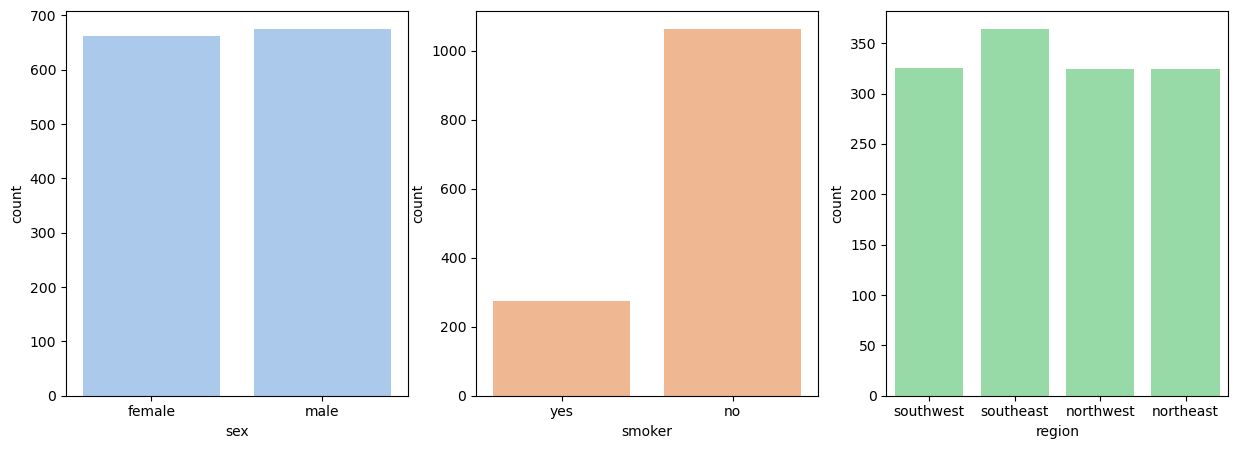

In [17]:
# lets have a sub plots on catagorical columns
color = sns.color_palette('pastel')[0:3]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='sex', data=df, ax=ax[0], color=color[0])
sns.countplot(x='smoker', data=df, ax=ax[1], color=color[1])
sns.countplot(x='region', data=df, ax=ax[2], color=color[2])
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


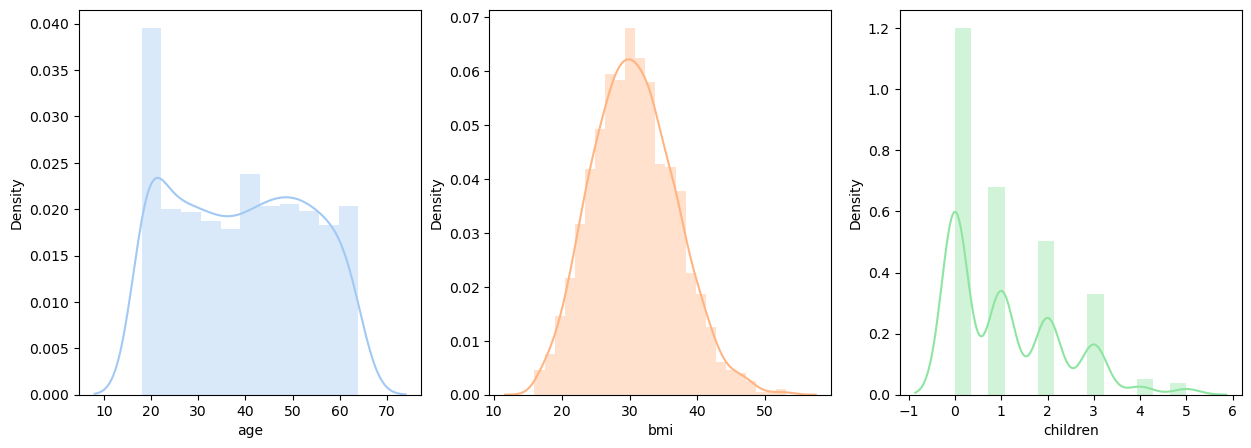

In [19]:
# lets get distplot on numerical columns
color = sns.color_palette('pastel')[0:3]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.distplot(df['age'], ax=ax[0], color=color[0])
sns.distplot(df['bmi'], ax=ax[1], color=color[1])
sns.distplot(df['children'], ax=ax[2], color=color[2])
plt.show()

### BiVar Analysis

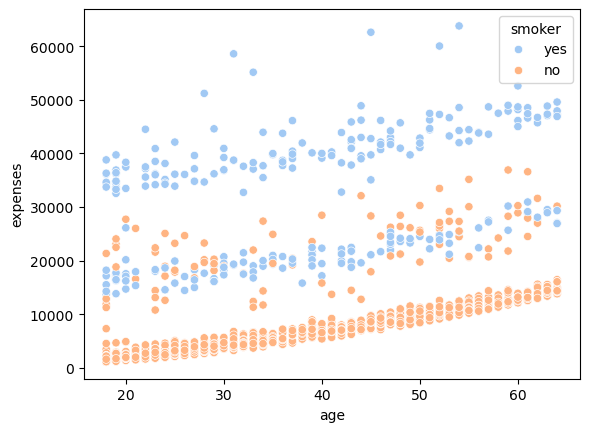

In [22]:
# lets get the scatterplot between age and expenses
sns.scatterplot(x='age', y='expenses', data=df, hue='smoker', palette='pastel');
plt.show() 

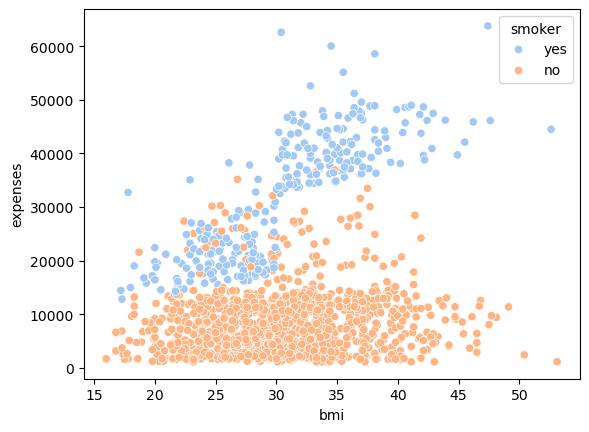

In [24]:
sns.scatterplot(x='bmi', y='expenses', data=df, hue='smoker', palette='pastel');

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [5]:
# get dummies
df = pd.get_dummies(df, drop_first=True)
df.head()


age   bmi  children  expenses  sex_male  smoker_yes  region_northwest  \
0   19  27.9         0  16884.92     False        True             False   
1   18  33.8         1   1725.55      True       False             False   
2   28  33.0         3   4449.46      True       False             False   
3   33  22.7         0  21984.47      True       False              True   
4   32  28.9         0   3866.86      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False

In [6]:
X = df.drop('expenses', axis=1)
y = df['expenses']

In [28]:
X.head()

age   bmi  children  sex_male  smoker_yes  region_northwest  \
0   19  27.9         0     False        True             False   
1   18  33.8         1      True       False             False   
2   28  33.0         3      True       False             False   
3   33  22.7         0      True       False              True   
4   32  28.9         0      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False

In [7]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
LR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
LR_Accuracy

81

In [8]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
from sklearn.metrics import r2_score
PR_Accuracy=round(r2_score(y_test, poly_model.predict(X_test_poly)) * 100)
PR_Accuracy

88

In [37]:
# decission tree regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
DTR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
DTR_Accuracy

78

In [38]:
# support vector regression
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
SVR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
SVR_Accuracy

-13

In [14]:
# random forese regressor with estimate
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(X_train, y_train)
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, RF_model.predict(X_test)) * 100)
RFR_Accuracy

86

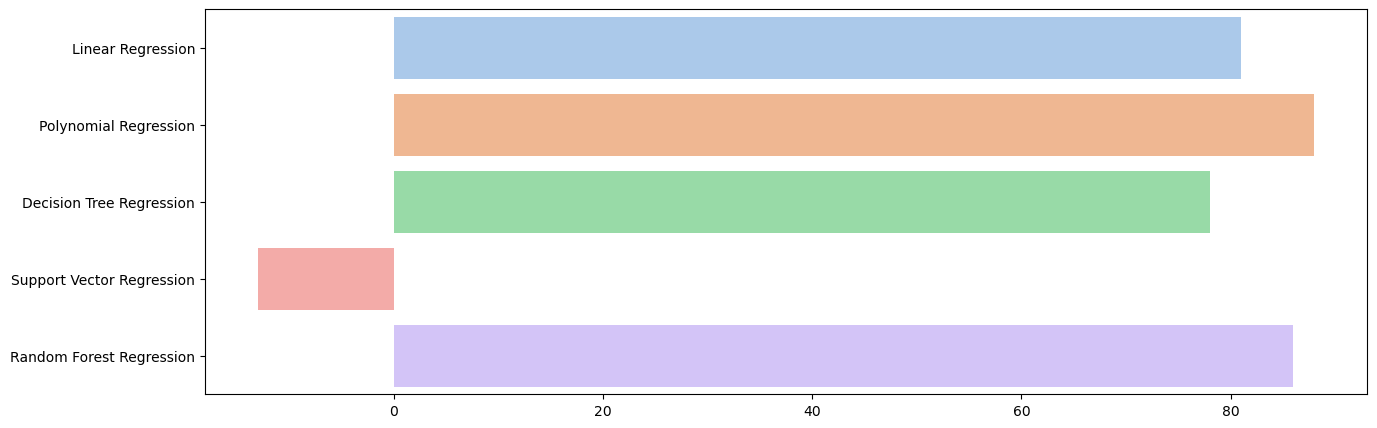

In [43]:
models = ["Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Support Vector Regression", "Random Forest Regression"]
Accuracy = [LR_Accuracy, PR_Accuracy, DTR_Accuracy, SVR_Accuracy, RFR_Accuracy]
plt.figure(figsize=(15, 5))
sns.barplot(x=Accuracy, y=models, palette='pastel');

In [11]:
# use polynomial model to predict new input
new_data = pd.DataFrame({'age': [25], 'bmi': [30.5], 'children': [2], 'sex_male': [1], 'smoker_yes': [0], 'region_northwest': [0], 'region_southeast': [0], 'region_southwest': [1]})
#new_data
new_data = poly.transform(new_data)
new_data
poly_model.predict(new_data)

array([4109.78125])

In [ ]:
# save polynomial regression model
#import pickle
#pickle.dump(poly_model, open('poly_model.pkl', 'wb'))

In [15]:
# save random forest model
import pickle
pickle.dump(RF_model, open('RF_model.pkl', 'wb'))
